In [1]:
%matplotlib inline

#Dependencies
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import gmaps
import gmaps.datasets
import folium

import warnings
warnings.filterwarnings('ignore')

In [2]:
indeed_data = pd.read_csv('./resources/01_indeed_job_dataset.csv')
indeed_data.head()

,id,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,0,Data Engineer,https://www.indeed.com/rc/clk?jk=5a2a43234c789...,80000-99999,data_scientist,"['Microsoft SQL Server', 'Technical Writing', ...",6,Colorado Community Managed Care Network,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,1,Data Scientist,https://www.indeed.com/rc/clk?jk=df00df326efa1...,>160000,data_scientist,"['TensorFlow', 'Machine Learning', 'Hadoop', '...",11,Cisco Systems,4251.0,4.1,...,0,0,0,0,0,1,0,0,0,0
2,2,Data Scientist,https://www.indeed.com/rc/clk?jk=fbb4b61d6a578...,140000-159999,data_scientist,"['TensorFlow', 'Machine Learning', 'Hadoop', '...",11,Cisco Systems,4251.0,4.1,...,0,0,0,0,0,1,0,0,0,0
3,3,Data Scientist,https://www.indeed.com/rc/clk?jk=8b80cf0fbff8c...,>160000,data_scientist,"['TensorFlow', 'Machine Learning', 'Hadoop', '...",11,Cisco Systems,4251.0,4.1,...,0,0,0,0,0,1,0,0,0,0
4,4,Data Engineer,https://www.indeed.com/rc/clk?jk=051578f616806...,100000-119999,data_scientist,"['TS/SCI Clearance', 'Signal Processing', 'Mic...",3,DCS Corp,46.0,4.5,...,0,0,0,1,0,0,0,0,0,1


In [3]:
indeed_Jobtype_df = indeed_data[['id','Job_Type','Job_Title','Location','Company']]
indeed_Jobtype_df.head()

,id,Job_Type,Job_Title,Location,Company
0,0,data_scientist,Data Engineer,NaN,Colorado Community Managed Care Network
1,1,data_scientist,Data Scientist,CA,Cisco Systems
2,2,data_scientist,Data Scientist,CA,Cisco Systems
3,3,data_scientist,Data Scientist,CA,Cisco Systems
4,4,data_scientist,Data Engineer,FL,DCS Corp


In [4]:
# Total Number of Jobs Positions Availables
Tot_Jobs = pd.DataFrame({"Total Positions Open":[len(indeed_data['id'].unique())]})
Tot_Jobs

,Total Positions Open
0,5715


In [5]:
Job_counts = indeed_Jobtype_df["Job_Type"].value_counts()
Job_counts

data_scientist    2543
data_analyst      1793
data_engineer     1379
Name: Job_Type, dtype: int64

In [6]:
#Group the dataset by Job Type and State
total_jobs = len(indeed_Jobtype_df)

Job_perc = Job_counts/total_jobs
Job_perc = Job_perc.map(lambda n: '{:.2%}'.format(n))
Job_perc

data_scientist    44.50%
data_analyst      31.37%
data_engineer     24.13%
Name: Job_Type, dtype: object

Text(0, 0.5, 'Job Positions Open by Job Type')

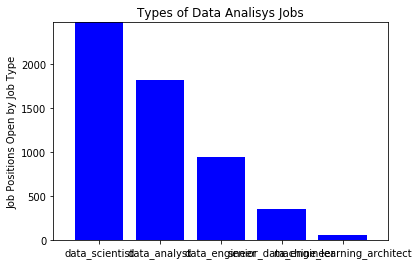

In [7]:
counts = [2469, 1816, 943, 349, 61]
x_axis = np.arange(len(counts))

plt.bar(x_axis, counts, color='b', align="center")
plt.ylim(0, max(counts)+ 1500)

tick_locations = [value for value in x_axis]
plt.xlim(-0.75, len(x_axis) -0.25)
plt.ylim(0, max(counts)+0.5)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["data_scientist", "data_analyst", "data_engineer", "senior_data_engineer", 
           "machine_learning_architect","principal_data_engineer", "master_data_engineer"])
plt.title("Types of Data Analisys Jobs")
plt.ylabel("Job Positions Open by Job Type")


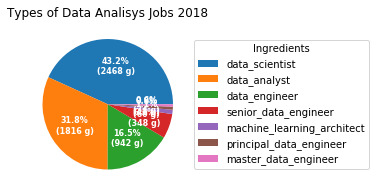

In [8]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

jobs = ["2469 data_scientist", "1816 data_analyst", "943 data_engineer", "349 senior_data_engineer", 
        "61 machine_learning_architect","43 principal_data_engineer", "34 master_data_engineer"]

data = [float(x.split()[0]) for x in jobs]
counts = [x.split()[-1] for x in jobs]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, counts,
          title="Ingredients",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Types of Data Analisys Jobs 2018")

plt.show()

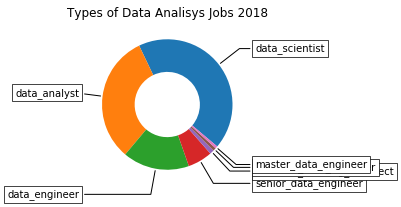

In [9]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))



counts = [2469, 1816, 943, 349, 61, 43,34]
jobs = ["data_scientist", "data_analyst", "data_engineer", "senior_data_engineer", 
        "machine_learning_architect","principal_data_engineer", "master_data_engineer"]


wedges, texts = ax.pie(counts, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(jobs[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Types of Data Analisys Jobs 2018")

plt.show()

['data_scientist', 'data_analyst', 'data_engineer', 'senior_data_engineer', 'machine_learning_architect', 'principal_data_engineer', 'master_data_engineer']
[2469, 1816, 943, 349, 61, 43, 34]


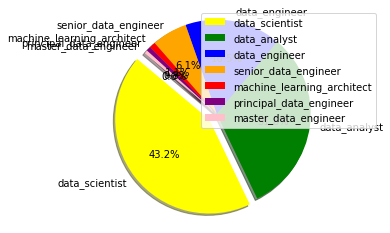

In [10]:
#create bar graph to illustrate number of Data Analysis jobs per state
counts = [2469, 1816, 943, 349, 61, 43,34]
jobs = ["data_scientist", "data_analyst", "data_engineer", "senior_data_engineer", 
        "machine_learning_architect","principal_data_engineer", "master_data_engineer"]

sizes = counts
labels = jobs
print(labels)
print(sizes)

colors = ["yellow", "green", "blue", "orange", "red","purple", "pink"]
explode = (0.1, 0, 0, 0, 0, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.legend()
plt.show()